### Read and Pre-process

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
data=pd.read_excel('xxxx.xlsm', sheet_name='NSE')
data.to_csv('test.csv')
CMP=float(11642.40)
data2=pd.read_csv('test.csv', header=1)

### Put Data

In [2]:
put_data=data2[[ 'Strike Price', 'Bid.2', 'Bid.3','Ask.2', 'Ask.3', 'Net Chng.1', 'LTP.1']]
put_data['LTP.1']=put_data['LTP.1'].replace('-',0)
put_data['LTP.1']=put_data['LTP.1'].astype(float)

data_to_analise=put_data[(put_data['Strike Price']<CMP+600)& (put_data['Strike Price']>CMP-600)]
st_list=list(data_to_analise['Strike Price'])
st_ltp=list(data_to_analise['LTP.1'])
st_lpt=list(zip(st_list,st_ltp))

###Buy Put 
buy_put=pd.DataFrame()
expiration=[]
intrinsic=[]
st_price=[]
profi_loss=[]
premimum=[]

for i, j in st_lpt:
    for strice in list(data_to_analise['Strike Price']):
        expiration.append(strice)
        intrinsic_value=max(i-strice,0)
        intrinsic.append(intrinsic_value)
        p_loss=(intrinsic_value-j)*75
        profi_loss.append(p_loss)
        st_price.append(i)
        premimum.append(j)

#         print(i*j*75)
#         print(strice)

buy_put['Expiration']=expiration
buy_put['intrinsic']=intrinsic
buy_put['strike']=st_price
buy_put['profit_loss']=profi_loss
buy_put['premium']=premimum
print('This is buy put data')
buy_put[buy_put['strike']==11800.0]

This is buy put data


,Expiration,intrinsic,strike,profit_loss,premium
360,11050.0,750.0,11800.0,38542.5,236.1
361,11100.0,700.0,11800.0,34792.5,236.1
362,11150.0,650.0,11800.0,31042.5,236.1
363,11200.0,600.0,11800.0,27292.5,236.1
364,11250.0,550.0,11800.0,23542.5,236.1
365,11300.0,500.0,11800.0,19792.5,236.1
366,11350.0,450.0,11800.0,16042.5,236.1
367,11400.0,400.0,11800.0,12292.5,236.1
368,11450.0,350.0,11800.0,8542.5,236.1
369,11500.0,300.0,11800.0,4792.5,236.1


In [3]:
put_data=data2[[ 'Strike Price', 'Bid.2', 'Bid.3','Ask.2', 'Ask.3', 'Net Chng.1', 'LTP.1']]
put_data['LTP.1']=put_data['LTP.1'].replace('-',0)
put_data['LTP.1']=put_data['LTP.1'].astype(float)

data_to_analise=put_data[(put_data['Strike Price']<CMP+600)& (put_data['Strike Price']>CMP-600)]
st_list=list(data_to_analise['Strike Price'])
st_ltp=list(data_to_analise['LTP.1'])
st_lpt=list(zip(st_list,st_ltp))

###sell Put 
sell_Put=pd.DataFrame()
expiration=[]
intrinsic=[]
st_price=[]
profi_loss=[]
premimum=[]

for i, j in st_lpt:
    for strice in list(data_to_analise['Strike Price']):
        expiration.append(strice)
        intrinsic_value=max(i-strice,0)
        intrinsic.append(intrinsic_value)
        p_loss=(j-intrinsic_value)*75
        profi_loss.append(p_loss)
        st_price.append(i)
        premimum.append(j)
#         print(i*j*75)
#         print(strice)

sell_Put['Expiration']=expiration
sell_Put['intrinsic']=intrinsic
sell_Put['strike']=st_price
sell_Put['profit_loss']=profi_loss
sell_Put['premium']=premimum

print('This is sell put data')
sell_Put[sell_Put['strike']==11800.0]

This is sell put data


,Expiration,intrinsic,strike,profit_loss,premium
360,11050.0,750.0,11800.0,-38542.5,236.1
361,11100.0,700.0,11800.0,-34792.5,236.1
362,11150.0,650.0,11800.0,-31042.5,236.1
363,11200.0,600.0,11800.0,-27292.5,236.1
364,11250.0,550.0,11800.0,-23542.5,236.1
365,11300.0,500.0,11800.0,-19792.5,236.1
366,11350.0,450.0,11800.0,-16042.5,236.1
367,11400.0,400.0,11800.0,-12292.5,236.1
368,11450.0,350.0,11800.0,-8542.5,236.1
369,11500.0,300.0,11800.0,-4792.5,236.1


### Call Data

In [4]:
data2.columns

Index(['0', 'Chart', 'OI', 'Chng in OI', 'Volume', 'IV', 'LTP', 'Net Chng',
       'Bid', 'Bid.1', 'Ask', 'Ask.1', 'Strike Price', 'Bid.2', 'Bid.3',
       'Ask.2', 'Ask.3', 'Net Chng.1', 'LTP.1', 'IV.1', 'Volume.1',
       'Chng in OI.1', 'OI.1', 'Chart.1'],
      dtype='object')

In [5]:
call_data=data2[['LTP', 'Net Chng','Bid', 'Bid.1', 'Ask', 'Ask.1', 'Strike Price']]
call_data['LTP']=call_data['LTP'].replace('-',0)
call_data['LTP']=call_data['LTP'].astype(float)

data_to_analise=call_data[(call_data['Strike Price']<CMP+500)& (call_data['Strike Price']>CMP-500)]
st_list=list(data_to_analise['Strike Price'])
st_ltp=list(data_to_analise['LTP'])
st_lpt=list(zip(st_list,st_ltp))

###CALL Buy 
buy_call=pd.DataFrame()
expiration=[]
intrinsic=[]
st_price=[]
profi_loss=[]
premimum=[]
for i, j in st_lpt:
    for strice in list(data_to_analise['Strike Price']):
        expiration.append(strice)
        intrinsic_value=max(strice-i,0)
        intrinsic.append(intrinsic_value)
        p_loss=(intrinsic_value-j)*75
        profi_loss.append(p_loss)
        st_price.append(i)
        premimum.append(j)
#         print(i*j*75)
#         print(strice)

buy_call['Expiration']=expiration
buy_call['intrinsic']=intrinsic
buy_call['strike']=st_price
buy_call['profit_loss']=profi_loss
buy_call['premium']=premimum

print('This is CALL Buy  data')
buy_call[buy_call['strike']==11800.0]

This is CALL Buy  data


,Expiration,intrinsic,strike,profit_loss,premium
260,11150.0,0.0,11800.0,-5475.0,73.0
261,11200.0,0.0,11800.0,-5475.0,73.0
262,11250.0,0.0,11800.0,-5475.0,73.0
263,11300.0,0.0,11800.0,-5475.0,73.0
264,11350.0,0.0,11800.0,-5475.0,73.0
265,11400.0,0.0,11800.0,-5475.0,73.0
266,11450.0,0.0,11800.0,-5475.0,73.0
267,11500.0,0.0,11800.0,-5475.0,73.0
268,11550.0,0.0,11800.0,-5475.0,73.0
269,11600.0,0.0,11800.0,-5475.0,73.0


In [6]:
call_data['LTP']=call_data['LTP'].replace('-',0)
call_data['LTP']=call_data['LTP'].astype(float)

data_to_analise=call_data[(call_data['Strike Price']<CMP+500)& (call_data['Strike Price']>CMP-500)]
st_list=list(data_to_analise['Strike Price'])
st_ltp=list(data_to_analise['LTP'])
st_lpt=list(zip(st_list,st_ltp))

###CALL Sell 
sell_call=pd.DataFrame()
expiration=[]
intrinsic=[]
st_price=[]
profi_loss=[]
premimum=[]
for i, j in st_lpt:
    for strice in list(data_to_analise['Strike Price']):
        expiration.append(strice)
        intrinsic_value=max(strice-i,0)
        intrinsic.append(intrinsic_value)
        p_loss=(j-intrinsic_value)*75
        profi_loss.append(p_loss)
        st_price.append(i)
        premimum.append(j)
#         print(i*j*75)
#         print(strice)

sell_call['Expiration']=expiration
sell_call['intrinsic']=intrinsic
sell_call['strike']=st_price
sell_call['profit_loss']=profi_loss
sell_call['premium']=premimum

print('This is sell call  data')
sell_call[sell_call['strike']==11800.0]

This is sell call  data


,Expiration,intrinsic,strike,profit_loss,premium
260,11150.0,0.0,11800.0,5475.0,73.0
261,11200.0,0.0,11800.0,5475.0,73.0
262,11250.0,0.0,11800.0,5475.0,73.0
263,11300.0,0.0,11800.0,5475.0,73.0
264,11350.0,0.0,11800.0,5475.0,73.0
265,11400.0,0.0,11800.0,5475.0,73.0
266,11450.0,0.0,11800.0,5475.0,73.0
267,11500.0,0.0,11800.0,5475.0,73.0
268,11550.0,0.0,11800.0,5475.0,73.0
269,11600.0,0.0,11800.0,5475.0,73.0


In [ ]:
viz_data=sell_call[sell_call['strike']==11800]

In [ ]:
sell_call.dtypes

### Butterfly Call Strategy

In [ ]:
start_strike=round(CMP)+100-int(str(round(CMP))[-2:])
strategy=pd.DataFrame()
try:
    for i in range(start_strike,start_strike+600,100):
        fig = plt.figure(figsize=(10,5))
        buy_call_first=buy_call[buy_call['strike']==i]
        sell_call_first=sell_call[sell_call['strike']==i+100]
        sell_call_first['profit_loss']=sell_call_first['profit_loss'].apply(lambda x:x*2)
        buy_call_second=buy_call[buy_call['strike']==i+200]
        final_p_and_l=list(buy_call_first['profit_loss'].values+sell_call_first['profit_loss'].values+buy_call_second['profit_loss'].values)
        expire_list=list(buy_call_first['Expiration'].values)
        chart=pd.DataFrame({'Expiration':expire_list,'profit_loss':final_p_and_l})
        chart['strike_price']=i
        strategy=pd.concat([chart,strategy],axis=0)
        chart['Expiration']=chart['Expiration'].astype('object')
        plt.plot( 'Expiration','profit_loss',  data=chart, marker='', color='olive', linewidth=2,label=i)
        plt.title('Call_strategy '+str('buy ')+str(i)+str(' sell_2_lot ')+str(i+100)+str(' buy_')+str(i+200)+".png")
        fig.savefig('CALL_STRATEGY'+str(i)+".png")
#         plt.clf()
except ValueError:
    print('#### End of available strike price ####')
    
# try:
#   print(x)
# except NameError:
#   print("Variable x is not defined")
# except:
#   print("Something else went wrong")

### Butterfly Put Strategy

In [ ]:
# buy_put
# sell_Put[sell_Put['strike']==11500]

In [ ]:
start_strike=round(CMP)-100-int(str(round(CMP))[-2:])
strategy=pd.DataFrame()
try:
    for i in reversed(range(start_strike-600, start_strike+100, 100)):
        fig = plt.figure(figsize=(10,5))
        buy_put_first=buy_put[buy_put['strike']==i]
        sell_put_first=sell_Put[sell_Put['strike']==i-100]
        sell_put_first['profit_loss']=sell_put_first['profit_loss'].apply(lambda x:x*2)
        buy_put_second=buy_put[buy_put['strike']==i-200]
        final_p_and_l=list(buy_put_first['profit_loss'].values+sell_put_first['profit_loss'].values+buy_put_second['profit_loss'].values)
        expire_list=list(buy_put_first['Expiration'].values)
        chart=pd.DataFrame({'Expiration':expire_list,'profit_loss':final_p_and_l})
        chart['strike_price']=i
        print(i)
        strategy=pd.concat([chart,strategy],axis=0)
        chart['Expiration']=chart['Expiration'].astype('object')
        plt.plot( 'Expiration','profit_loss',  data=chart, marker='', color='olive', linewidth=2,label=i)
        plt.title(i)
        fig.savefig(str(i)+".png")
        plt.clf()
except ValueError:
    print('#### End of available strike price ####')

In [ ]:
# chart_put_chart_call

chart_call=chart
chart_call

In [ ]:
chart_put=chart
chart_put

### Double ButterFly

In [ ]:
# buy_put

# sell_Put

# buy_call

# sell_call

In [9]:
sell_call.head()

,Expiration,intrinsic,strike,profit_loss,premium
0,11150.0,0.0,11150.0,38118.75,508.25
1,11200.0,50.0,11150.0,34368.75,508.25
2,11250.0,100.0,11150.0,30618.75,508.25
3,11300.0,150.0,11150.0,26868.75,508.25
4,11350.0,200.0,11150.0,23118.75,508.25


In [11]:
len(sell_call)

400

In [13]:
buy_put.merge(sell_call,on='Expiration', how='left')

,Expiration,intrinsic_x,strike_x,profit_loss_x,premium_x,intrinsic_y,strike_y,profit_loss_y,premium_y
0,11050.0,0.0,11050.0,-1380.00,18.40,NaN,NaN,NaN,NaN
1,11100.0,0.0,11050.0,-1380.00,18.40,NaN,NaN,NaN,NaN
2,11150.0,0.0,11050.0,-1380.00,18.40,0.0,11150.0,38118.75,508.25
3,11150.0,0.0,11050.0,-1380.00,18.40,0.0,11200.0,35430.00,472.40
4,11150.0,0.0,11050.0,-1380.00,18.40,0.0,11250.0,31200.00,416.00
...,...,...,...,...,...,...,...,...,...
9691,12100.0,100.0,12200.0,-35576.25,574.35,100.0,12000.0,-5561.25,25.85
9692,12100.0,100.0,12200.0,-35576.25,574.35,50.0,12050.0,-2340.00,18.80
9693,12100.0,100.0,12200.0,-35576.25,574.35,0.0,12100.0,1027.50,13.70
9694,12150.0,50.0,12200.0,-39326.25,574.35,NaN,NaN,NaN,NaN


In [12]:
len(buy_put)

576

#### End of available strike price ####


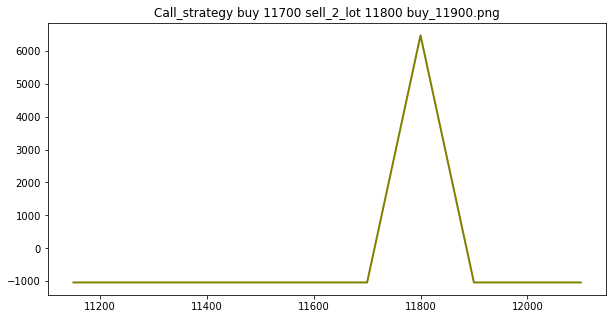

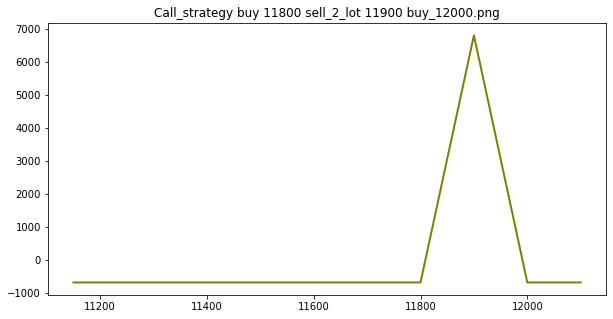

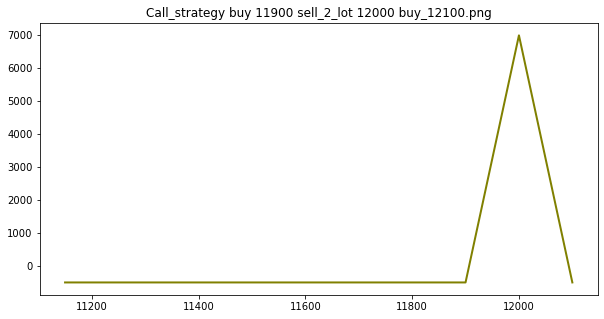

<Figure size 720x360 with 0 Axes>

In [8]:
start_strike=round(CMP)+100-int(str(round(CMP))[-2:])
strategy=pd.DataFrame()
try:
    for i in range(start_strike,start_strike+600,100):
        fig = plt.figure(figsize=(10,5))
        buy_call_first=buy_call[buy_call['strike']==i]
        sell_call_first=sell_call[sell_call['strike']==i+100]
        sell_call_first['profit_loss']=sell_call_first['profit_loss'].apply(lambda x:x*2)
        buy_call_second=buy_call[buy_call['strike']==i+200]
        final_p_and_l=list(buy_call_first['profit_loss'].values+sell_call_first['profit_loss'].values+buy_call_second['profit_loss'].values)
        expire_list=list(buy_call_first['Expiration'].values)
        chart=pd.DataFrame({'Expiration':expire_list,'profit_loss':final_p_and_l})
        chart['strike_price']=i
        strategy=pd.concat([chart,strategy],axis=0)
        chart['Expiration']=chart['Expiration'].astype('object')
        plt.plot( 'Expiration','profit_loss',  data=chart, marker='', color='olive', linewidth=2,label=i)
        plt.title('Call_strategy '+str('buy ')+str(i)+str(' sell_2_lot ')+str(i+100)+str(' buy_')+str(i+200)+".png")
        fig.savefig('CALL_STRATEGY'+str(i)+".png")
#         plt.clf()
except ValueError:
    print('#### End of available strike price ####')

### RAW CODES

In [ ]:
lot=75
negative=[]
postive=[]
for premium in data_to_analise['Strike Price']
for strice in list(data_to_analise['Strike Price']):
    print(i)

In [ ]:
###sell Put 
frame=pd.DataFrame()
expiration=[]
intrinsic=[]
st_price=[]
profi_loss=[]
for i, j in st_lpt:
    for strice in list(data_to_analise['Strike Price']):
        expiration.append(strice)
        intrinsic_value=max(i-strice,0)
        intrinsic.append(intrinsic_value)
        p_loss=(j-intrinsic_value)*75
        profi_loss.append(p_loss)
        st_price.append(i)
        print(i*j*75)
        print(strice)

In [ ]:
frame['Expiration']=expiration
frame['intrinsic']=intrinsic
frame['strike']=st_price
frame['profit_loss']=profi_loss

In [ ]:
frame[frame['strike']==11800.0]

In [ ]:
data2.loc[['LTP','Ask.2']]

# df.loc[['viper', 'sidewinder']]

In [ ]:
data2.rename(columns={'Bid':'Bid qty', 'Bid.1':'Bid Price'}).

In [ ]:
data2.columns

In [ ]:
list(zip(['a','b'],['d','d']))

In [ ]:
data2

In [ ]:
start_strike

In [ ]:
x = range(start_strike-500, start_strike+100, 100)
future_m_price=[]
for n in x:
  future_m_price.append(n)
future_m_price